## Basic Preprocessing
<hr>  

#### 문제  
- 이번 스터디에서 여러분은 간단한 데이터 전처리 방법에 대해 공부해볼 것입니다.  
- 데이터를 가지고 오는 것 부터 간단한 SQL Logic에 대해 알려드리고자 합니다.  
<br><br>
<hr>

#### 데이터 설명
- 제가 제공하는 파일인 "datasets/[~.csv]"는 쇼핑몰 사이트에서 얻을 수 있는 데이터입니다.
- 간단히 가공만 할 것이니 상세한 설명은 하지 않을 것입니다.  
  

※ 잘 따라오시면서 주어진 Inline Practice를 풀어보시기 바랍니다.
<br><br><br>
<hr>

In [12]:
# library
import pandas as pd

### 데이터를 읽어들입니다.  
- 먼저 4종류의 데이터를 읽어들입니다.  
- 4종류의 데이터는 모두 정형 데이터이며, csv 형식의 파일입니다.
<br><br>

#### **데이터 셋에 대한 상세**
- `customer_master`:고객의 성별과 연령 등 고객 상세 정보
- `item_master`:상품평, 상품 단가 등 상품에 대한 정보
- `transaction`:누가 언제 얼마나 구매하였는지에 대한 정보
- `transaction_detail`:구입한 상품과 수량 정보
  
<br><br>
※ 데이터 전처리를 하기 이전에 데이터가 무슨 의미를 가지고 있는지 아는 것은 매우 중요합니다.  

In [13]:
import pandas as pd
import numpy as np

In [14]:
customer_master = pd.read_csv('datasets/customer_master.csv')
customer_master.head(5)

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [79]:
item_master = pd.read_csv('datasets/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [16]:
transaction_1 = pd.read_csv('datasets/transaction_1.csv')
transaction_1.head(5)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [20]:
transaction_2 = pd.read_csv('datasets/transaction_2.csv')
transaction_2.head(5)

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [21]:
transaction_detail_1 = pd.read_csv('datasets/transaction_detail_1.csv')
transaction_detail_1.head(5)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


<hr><br>

##### **Inline Practice 1**  

- 데이터를 합치는(**union**) 작업을 수행합시다.
1) `transaction_1`과 `transaction_2`를 합치는 작업을 수행하세요.
2) `transaction_detail_1`과 `transaction_detail_2`를 합치는 작업을 수행하세요


※ pandas.concat() 메소드를 사용하세요.  
※ `transaction_2`와 `transaction_detail_2`는 읽어들이지 않았기 때문에 읽어주는 작업(read_csv)을 수행한 후 작업을 진행해주세요.
<br><br><br><hr>

In [22]:
transaction_detail_2 = pd.read_csv('datasets/transaction_detail_2.csv')
transaction_detail_2.head(5)

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [23]:
transaction = pd.concat([transaction_1, transaction_2], join='outer')


In [24]:
print(f"transaction_1's shape : {transaction_1.shape}")
print(f"transaction_2's shape : {transaction_2.shape}")
print(f"transaction's shape : {transaction.shape}")

transaction_1's shape : (5000, 4)
transaction_2's shape : (1786, 4)
transaction's shape : (6786, 4)


In [25]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], join='outer')

In [26]:
print(f"transaction_detail_1's shape : {transaction_detail_1.shape}")
print(f"transaction_detail_2's shape : {transaction_detail_2.shape}")
print(f"transaction_detail's shape : {transaction_detail.shape}")

transaction_detail_1's shape : (5000, 4)
transaction_detail_2's shape : (2144, 4)
transaction_detail's shape : (7144, 4)


<hr><br>

##### **Inline Practice 2**  

- 데이터를 결합하는(**join**) 작업을 수행합시다.
- 기준이 되는 column을 정확이 정한 후에 데이터를 join해야 합니다.
> 추가하고 싶은 column이 무엇인가?

> 공통되는 column은 무엇인가?

위 두 조건을 곰곰히 생각해보면서 문제를 해결해보세요.
<br><br>

1) `transaction_detail` 테이블에 `transaction`의 `payment_date`, `customer_id`를 결합(left join)하세요.

<br><br>  
※ pandas.merge() 메소드를 사용하세요.  
※ 공통되는 column은 `transaction_id`입니다. 이 column을 key로 지정하면 문제를 수월하게 풀 수 있습니다.
<br><br><br><hr>

In [27]:
'''
- merge
- left join
'''

join_df = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], how="left", on='transaction_id')

In [28]:
print(f"transaction_detail's cols : {list(transaction_detail.columns)}")
print(f"transaction's cols : {list(transaction.columns)}")
print(f"join_df's cols : {list(join_df.columns)}")

transaction_detail's cols : ['detail_id', 'transaction_id', 'item_id', 'quantity']
transaction's cols : ['transaction_id', 'price', 'payment_date', 'customer_id']
join_df's cols : ['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date', 'customer_id']


<hr><br>

##### **Inline Practice 3**  

- **inline Practice 2**와 동일하게 데이터를 결합하는(**join**) 작업을 수행합시다.
- 기준이 되는 column을 정확이 정한 후에 데이터를 join해야 합니다.

1) `join_df` 테이블과 `customer_master`를 결합(left join)하세요. (`customer_id`를 key로 사용)
2) `join_df` 테이블과 `item_master`를 결합(left join)하세요. (`item_id`를 key로 사용)

<br><br><br><hr>

In [29]:

join_df = pd.merge(join_df, customer_master, how="left", on='customer_id')

In [30]:
join_df = pd.merge(join_df, item_master, how="left", on='item_id')

In [31]:
print(f"join_df's cols : \n{list(join_df.columns)}")

join_df's cols : 
['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date', 'customer_id', 'customer_name', 'registration_date', 'email', 'gender', 'age', 'birth', 'pref', 'item_name', 'item_price']


In [32]:
print(f"join_df's cols : \n{list(join_df.columns)}")

join_df's cols : 
['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date', 'customer_id', 'customer_name', 'registration_date', 'email', 'gender', 'age', 'birth', 'pref', 'item_name', 'item_price']


<br><br><br>  
#### 필요한 데이터는 만들어서 사용할 수 있습니다.
- 매출의 경우, `quantity` * `item_price`의 곱으로 계산할 수 있습니다.
- 위 계산을 한 결과를 dataframe에 추가합니다.

In [33]:
join_df['price'] = join_df['quantity'] * join_df['item_price']
join_df[['quantity', 'item_price', 'price']].head(5)

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [34]:
join_df['price'] = join_df['quantity'] * join_df['item_price']
join_df[['quantity', 'item_price', 'price']].head(5)

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


<br><br><br>  
#### 데이터 정보를 확인합니다.
- pandas.dataframe.info() 메소드를 사용하면 쉽게 각각의 column이 가지는 dtype를 쉽게 알 수 있습니다.

In [35]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          7144 non-null   int64 
 1   transaction_id     7144 non-null   object
 2   item_id            7144 non-null   object
 3   quantity           7144 non-null   int64 
 4   payment_date       7144 non-null   object
 5   customer_id        7144 non-null   object
 6   customer_name      7144 non-null   object
 7   registration_date  7144 non-null   object
 8   email              7144 non-null   object
 9   gender             7144 non-null   object
 10  age                7144 non-null   int64 
 11  birth              7144 non-null   object
 12  pref               7144 non-null   object
 13  item_name          7144 non-null   object
 14  item_price         7144 non-null   int64 
 15  price              7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 948.

<hr><br>

##### **Inline Practice 4**  

- 월별로 데이터를 정리해봅시다.
- `payment_date` column을 datetime 형으로 변환한 후, 월(month) 정보만 따로 `payment_month` column으로 만들어 저장하세요.

1) pandas.to_datetime() 메소드를 사용하여 dtype를 datetime으로 변환하세요.
2) datetime.dt.strftime() 메소드를 사용하여 월(month) 정보만 추출한 후, 기존 dataframe에 `payment_month` column을 새로 만드세요.

<br><br><br><hr>

In [36]:
'''
to datetime
'''

join_df['payment_date'] = pd.to_datetime(join_df['payment_date'])


In [50]:
import datetime as dt
join_df['payment_month'] = join_df['payment_date'].dt.strftime('%m')

In [52]:
join_df.head()
join_df.tail()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,payment_month
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000,180000,07
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000,85000,07
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000,100000,07
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000,85000,07
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214,이승채,2019-04-07 3:20,tahara_yuuko@example.com,F,74,1944-12-18,대전광역시,PC-B,85000,85000,07


<hr><br>

##### **Inline Practice 5**  

- 월별(`payment_month`), 상품 별(`item_name`)로 매출(`price`)의 합계와 판매된 상품 개수(`quantity`)의 합을 표로 시각화해봅시다.
- pandas.dataframe.groupby() 메소드를 사용하여 자유롭게 시각화해보세요.


<br><br><br><hr>

In [54]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [59]:
join_groupby = join_df.groupby(['payment_month', 'item_name'])['price', 'quantity'].sum()

C:\Users\0105l\AppData\Local\Temp\ipykernel_26080\513074502.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  join_groupby = join_df.groupby(['payment_month', 'item_name'])['price', 'quantity'].sum()


In [60]:
join_groupby

price  quantity
payment_month item_name                    
02            PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
03            PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
04            PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
05            PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
06            PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
07            PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

price    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

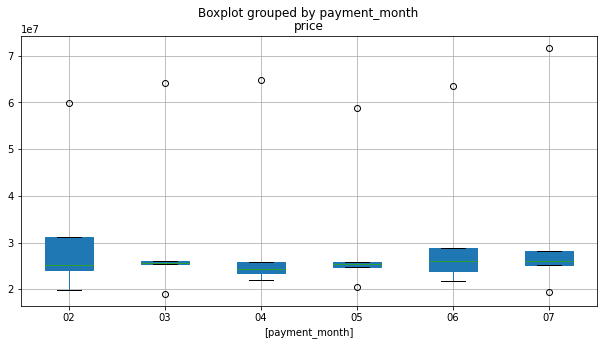

In [73]:
join_groupby[['price']].boxplot(
    by="payment_month", figsize=(10, 5),
    return_type = 'both',
    patch_artist = True
)

quantity    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

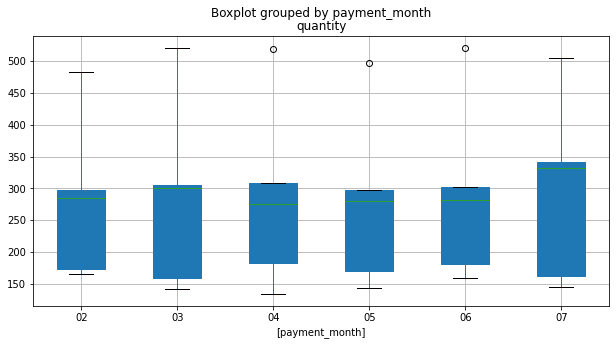

In [74]:
join_groupby[['quantity']].boxplot(
    by="payment_month", figsize=(10, 5),
    return_type = 'both',
    patch_artist = True
)

price    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

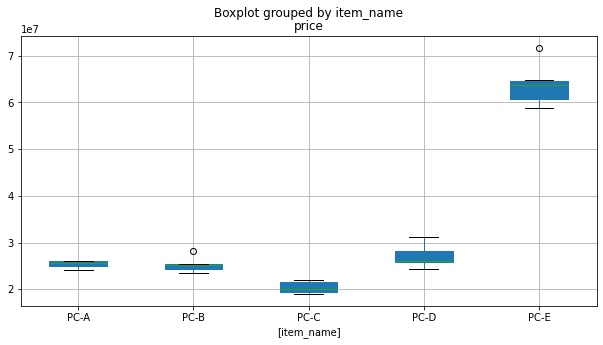

In [75]:
join_groupby[['price']].boxplot(
    by="item_name", figsize=(10, 5),
    return_type = 'both',
    patch_artist = True
)

quantity    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

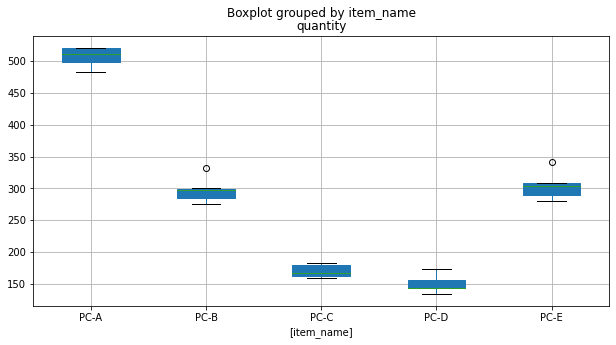

In [76]:
join_groupby[['quantity']].boxplot(
    by="item_name", figsize=(10, 5),
    return_type = 'both',
    patch_artist = True
)